In [1]:
! pip3 install Pillow


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from PIL import Image
from PIL.ExifTags import TAGS
import json
import os
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial import KDTree
from webcolors import (CSS3_HEX_TO_NAMES, hex_to_rgb,)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

imagename = "ImagesPokemon/abra.png"

image = Image.open(imagename)

In [3]:
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}

for label,value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : ImagesPokemon/abra.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1


In [4]:
def convert_P_to_RGBA():
    dossier = "ImagesPokemon"
    for filename in os.listdir(dossier):
        imagename = os.path.join(dossier, filename)

        if os.path.isfile(imagename):
            image = Image.open(imagename)
            if image.mode == 'P':
                image2 = image.convert('RGBA')
                image2.save(image.filename.replace("ImagesPokemon/","ImagesPokemonPASP/"))
    return "Ok"

In [5]:
i=0
dossier = "ImagesPokemon"
for filename in os.listdir(dossier):
    imagename = os.path.join(dossier, filename)
    if os.path.isfile(imagename):
        image = Image.open(imagename)
    
    info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
    }

    for label,value in info_dict.items():
        print(f"{label:25}: {value}")

Filename                 : ImagesPokemon/parasect.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/lumineon.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/raikou.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/comfey.jpg
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format 

In [6]:
#"function that convert RGB numbers into a color name"
def rgb_to_name(rgb):
    # a disctionnary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb)
    return f'{names[index]}'

#En dessous, plot et pie des couleurs prédominantes

def find_predominant_color(imagepath):

    nombre_couleurs = 5 #Un de plus que ce qu'on veux

    imgfile = Image.open(imagepath)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    clusters = MiniBatchKMeans(n_clusters=nombre_couleurs)
    clusters.fit(numarray)
    npbins = numpy.arange(0, nombre_couleurs+1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    [list1,list2] = histogram
    list1,list2 = zip(*sorted(zip(list1,list2),reverse=True))
    histogram_sort = [list1,list2]

    labels = numpy.unique(clusters.labels_)
    #barlist = plot.bar(labels[1:], histogram_sort[0][1:])
    list_colors = []
    colornames = []
    for i in range(nombre_couleurs-1):
        list_colors.append(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][2]),
            )
        )
        #barlist[i].set_color(
        #    "#%02x%02x%02x"
        #    % (
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][2]),
        #    )
        #)
        rgb = [math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][2]),]
        colornames.append(rgb_to_name(rgb))
    #plot.show()
    #fig,ax = plot.subplots()
    #ax.pie(histogram_sort[0][1:], startangle=90, colors=list_colors)
    #ax.axis('equal')
    #plot.show()

    return colornames

In [99]:
def write_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

import os
toutes_les_infos = []
df = pd.read_csv('All_Pokemon.csv', sep=',')
dossier = "ImagesPokemon"
for filename in os.listdir(dossier):
    imagename = os.path.join(dossier, filename)
    if os.path.isfile(imagename):
        image = Image.open(imagename)
        couleur = find_predominant_color(imagename)

        for i in range(len(df)):
            if df["Name"][i].lower() == image.filename.split(".")[0].split("/")[1]:
                #type2 = df["Type 2"][i]
                #if type2 == "NaN":
                #    type2 = "None"
                info_dict = {
                "Filename": image.filename,
                "Name" : image.filename.split(".")[0].split("/")[1].capitalize(),
                "Image Size": image.size,
                "Image Height": image.height,
                "Image Width": image.width,
                "Image Format": image.format,
                "Image Mode": image.mode,
                "Image is Animated": getattr(image, "is_animated", False),
                "Frames in Image": getattr(image, "n_frames", 1),
                "Predominant color": [
                    couleur[0],
                    couleur[1],
                    couleur[2],
                    couleur[3]
                ],
                "Type 1": df["Type 1"][i],
                #"Type 2": type2,
                "Generation": df["Generation"][i],
                "Legendary": df["Legendary"][i],
                "Mega Evolution": df["Mega Evolution"][i],
                "Height": df["Height"][i],
                "Weight": df["Weight"][i],
                }
                toutes_les_infos.append(info_dict)
                print("Pokemon trouvé : " + image.filename.split(".")[0].split("/")[1].capitalize())
                break

write_json("pokemonjson.json", toutes_les_infos)

Pokemon trouvé : Parasect
Pokemon trouvé : Lumineon
Pokemon trouvé : Raikou
Pokemon trouvé : Comfey
Pokemon trouvé : Dedenne
Pokemon trouvé : Pyroar
Pokemon trouvé : Articuno
Pokemon trouvé : Magmortar
Pokemon trouvé : Bulbasaur
Pokemon trouvé : Banette
Pokemon trouvé : Staraptor
Pokemon trouvé : Pidove
Pokemon trouvé : Taillow
Pokemon trouvé : Charizard
Pokemon trouvé : Infernape
Pokemon trouvé : Sandshrew
Pokemon trouvé : Alakazam
Pokemon trouvé : Lickitung
Pokemon trouvé : Starmie
Pokemon trouvé : Yanmega
Pokemon trouvé : Yveltal
Pokemon trouvé : Zigzagoon
Pokemon trouvé : Petilil
Pokemon trouvé : Torterra
Pokemon trouvé : Purugly
Pokemon trouvé : Cresselia
Pokemon trouvé : Regigigas
Pokemon trouvé : Palkia
Pokemon trouvé : Marshadow
Pokemon trouvé : Froakie
Pokemon trouvé : Munna
Pokemon trouvé : Bellossom
Pokemon trouvé : Gabite
Pokemon trouvé : Mareep
Pokemon trouvé : Shieldon
Pokemon trouvé : Stoutland
Pokemon trouvé : Accelgor
Pokemon trouvé : Makuhita
Pokemon trouvé : Seviper


In [671]:
def get_all_tags():
    tags = []
    with open('pokemonjson.json', 'r') as f:
        jason = json.load(f)
    for pokemon in jason:
        tags.append([pokemon["Filename"].split(".")[0].split("/")[1].capitalize(),pokemon["Predominant color"][0],pokemon["Predominant color"][1],pokemon["Predominant color"][2],pokemon["Predominant color"][3],pokemon["Type 1"],pokemon["Generation"],pokemon["Legendary"],pokemon["Mega Evolution"],pokemon["Height"],pokemon["Weight"]])
    return tags

print(get_all_tags())

[['Parasect', 'sandybrown', 'mistyrose', 'rosybrown', 'saddlebrown', 'Bug', 1.0, 0.0, 0.0, 1.0, 29.5], ['Lumineon', 'darkslategray', 'paleturquoise', 'cadetblue', 'silver', 'Water', 4.0, 0.0, 0.0, 1.2, 24.0], ['Raikou', 'gold', 'darkgray', 'whitesmoke', 'dimgray', 'Electric', 2.0, 1.0, 0.0, 1.9, 178.0], ['Comfey', 'khaki', 'silver', 'gray', 'indianred', 'Fairy', 7.0, 0.0, 0.0, 0.1, 0.3], ['Dedenne', 'burlywood', 'darkslategray', 'darkkhaki', 'silver', 'Electric', 6.0, 0.0, 0.0, 0.2, 2.2], ['Pyroar', 'indianred', 'sandybrown', 'dimgray', 'silver', 'Fire', 6.0, 0.0, 0.0, 1.5, 81.5], ['Articuno', 'cornflowerblue', 'slategray', 'lavender', 'silver', 'Ice', 1.0, 1.0, 0.0, 1.7, 55.4], ['Magmortar', 'chocolate', 'gold', 'darkolivegreen', 'tan', 'Fire', 4.0, 0.0, 0.0, 1.6, 68.0], ['Bulbasaur', 'silver', 'gray', 'mediumseagreen', 'black', 'Grass', 1.0, 0.0, 0.0, 0.7, 6.9], ['Banette', 'darkgray', 'dimgray', 'darkgray', 'black', 'Ghost', 3.0, 0.0, 0.0, 1.1, 12.5], ['Staraptor', 'darkslategray', 

In [698]:
import random
def random_image_and_tags():
    dossier = "ImagesPokemon"
    imagename = random.choice(os.listdir(dossier))
    image = Image.open(os.path.join(dossier, imagename))
    
    tags = []
    for pokemon in get_all_tags():
        if image.filename.split(".")[0].split("/")[1].capitalize() in pokemon[0]:
            tags.append(pokemon[1])
            tags.append(pokemon[2])
            tags.append(pokemon[3])
            tags.append(pokemon[4])
            tags.append(pokemon[5])
            tags.append(pokemon[6])
            tags.append(pokemon[7])
            tags.append(pokemon[8])
            tags.append(pokemon[9])
            tags.append(pokemon[10])
            break
    if tags == []:
        random_image_and_tags()
    else:
        return tags, image, imagename

def tags_of_image(imagename):
    image = Image.open(os.path.join("ImagesPokemon", imagename))

    tags = []
    for pokemon in get_all_tags():
        if image.filename.split(".")[0].split("/")[1].capitalize() in pokemon[0]:
            tags.append(pokemon[1])
            tags.append(pokemon[2])
            tags.append(pokemon[3])
            tags.append(pokemon[4])
            tags.append(pokemon[5])
            tags.append(pokemon[6])
            tags.append(pokemon[7])
            tags.append(pokemon[8])
            tags.append(pokemon[9])
            tags.append(pokemon[10])
            break
    return tags, image, imagename

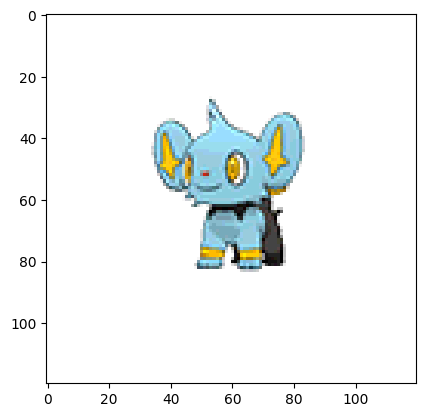

Do you like this image ? (y/n)


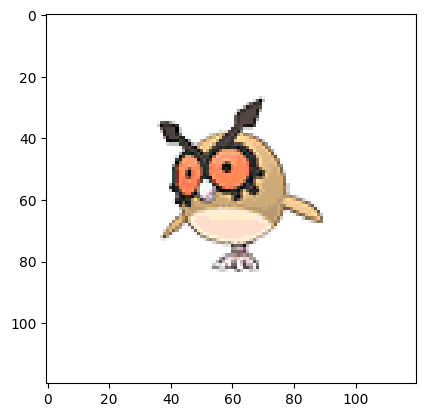

Do you like this image ? (y/n)


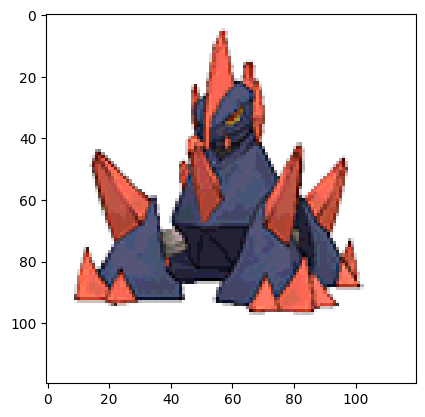

Do you like this image ? (y/n)


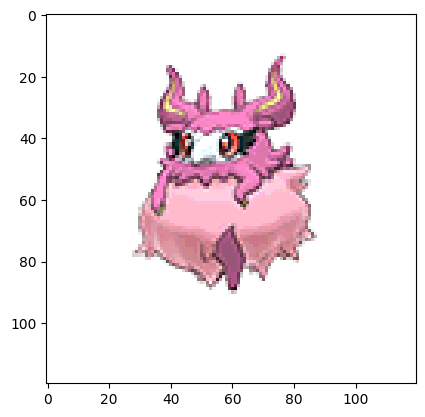

Do you like this image ? (y/n)


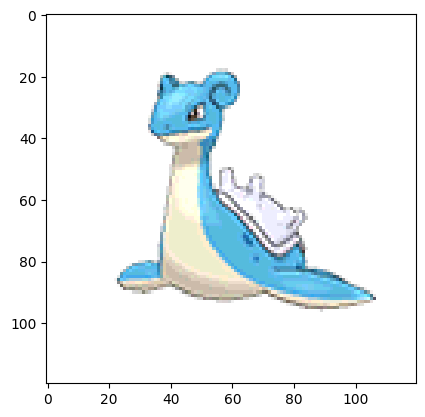

Do you like this image ? (y/n)


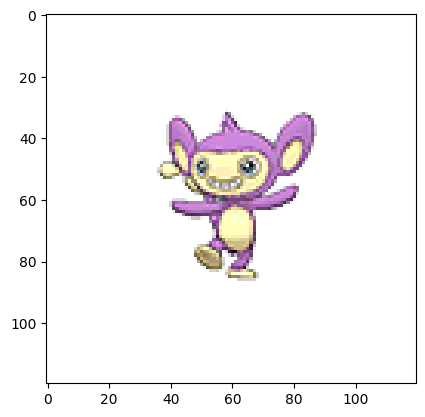

Do you like this image ? (y/n)


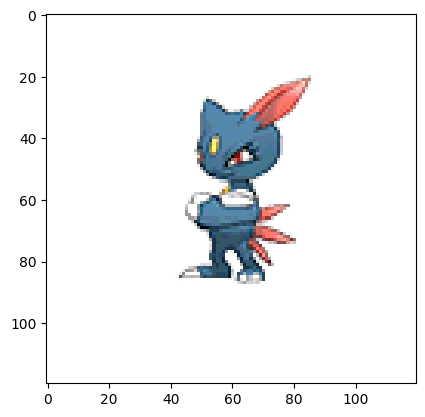

Do you like this image ? (y/n)


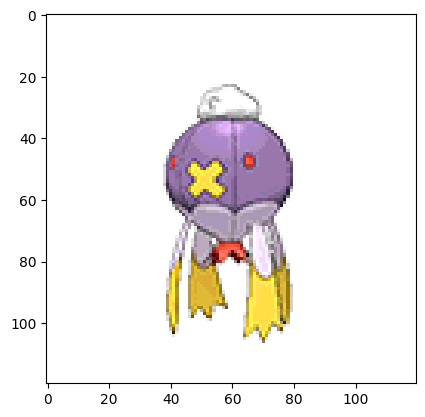

Do you like this image ? (y/n)


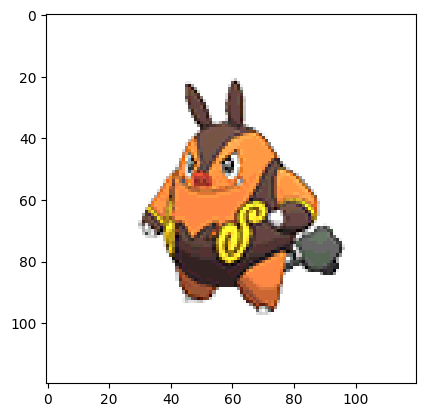

Do you like this image ? (y/n)


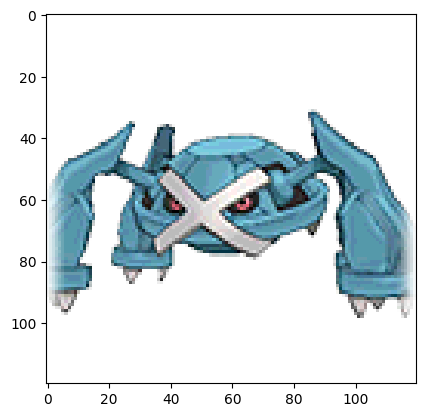

Do you like this image ? (y/n)


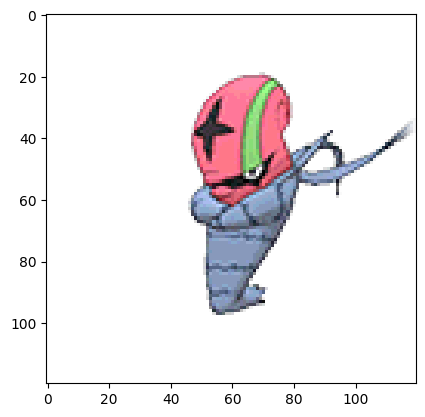

Do you like this image ? (y/n)


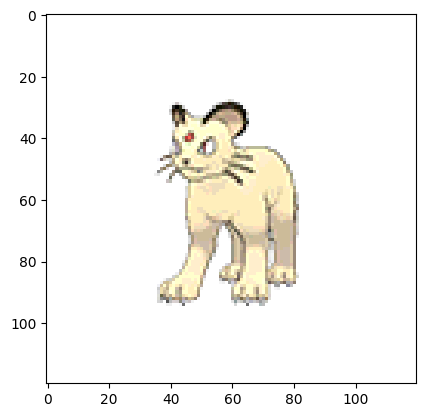

Do you like this image ? (y/n)


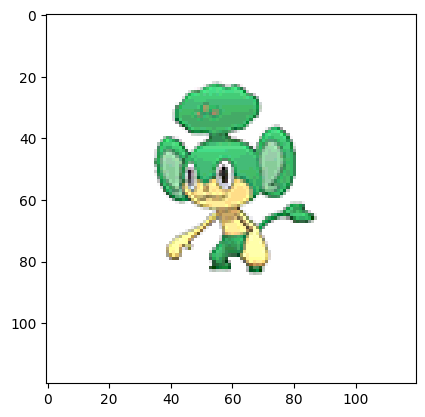

Do you like this image ? (y/n)


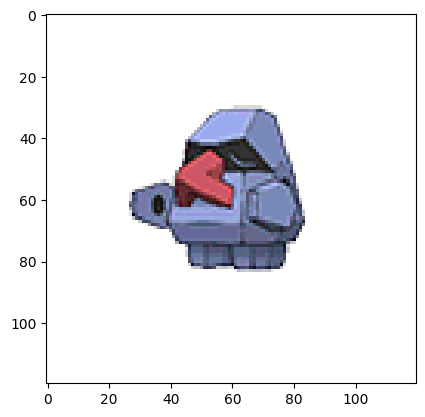

Do you like this image ? (y/n)


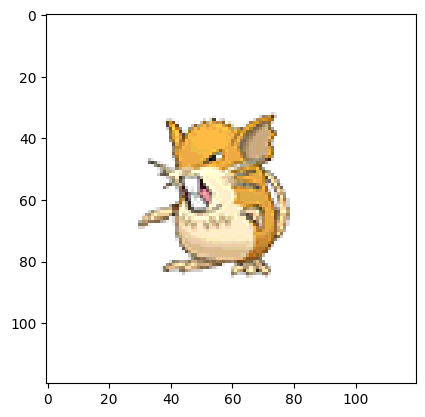

Do you like this image ? (y/n)


([['skyblue',
   'darkslategray',
   'goldenrod',
   'silver',
   'Electric',
   4.0,
   0.0,
   0.0,
   0.5,
   9.5],
  ['darksalmon',
   'bisque',
   'darkslategray',
   'black',
   'Normal',
   2.0,
   0.0,
   0.0,
   0.7,
   21.2],
  ['darkslategray',
   'sienna',
   'tomato',
   'darkgray',
   'Rock',
   5.0,
   0.0,
   0.0,
   1.7,
   260.0],
  ['lightpink',
   'palevioletred',
   'dimgray',
   'silver',
   'Fairy',
   6.0,
   0.0,
   0.0,
   0.8,
   15.5],
  ['gainsboro',
   'mediumturquoise',
   'slategray',
   'silver',
   'Water',
   1.0,
   0.0,
   0.0,
   2.5,
   220.0],
  ['wheat', 'gray', 'orchid', 'black', 'Normal', 2.0, 0.0, 0.0, 0.8, 11.5],
  ['steelblue',
   'darkslategray',
   'gray',
   'lightpink',
   'Dark',
   2.0,
   0.0,
   0.0,
   0.9,
   28.0],
  ['gray',
   'thistle',
   'goldenrod',
   'silver',
   'Ghost',
   4.0,
   0.0,
   0.0,
   1.2,
   15.0],
  ['sandybrown',
   'darkslategray',
   'sienna',
   'silver',
   'Fire',
   5.0,
   0.0,
   0.0,
   1.0,
   5

<Figure size 640x480 with 0 Axes>

In [717]:
def generate_preferences():
    liste_tags = []
    liste_fav_or_not = []
    for i in range(15):
        (tags, image, imagename) = random_image_and_tags()
        liste_tags.append(tags)
        plot.imshow(image)
        plot.show()
        print("Do you like this image ? (y/n)")
        reponse = input()
        plot.clf()
        if reponse == "y":
            liste_fav_or_not.append("Favori")
        else:
            liste_fav_or_not.append("Non favori")
    return liste_tags, liste_fav_or_not

dictionnaire_preferences = {} #On va mettre les préférences de chaque utilisateur dans un dictionnaire
generate_preferences()

In [723]:
dictionnaire_preferences = {} #On va mettre les préférences de chaque utilisateur dans un dictionnaire

# ATTENTION ZONE CACA DE RESET

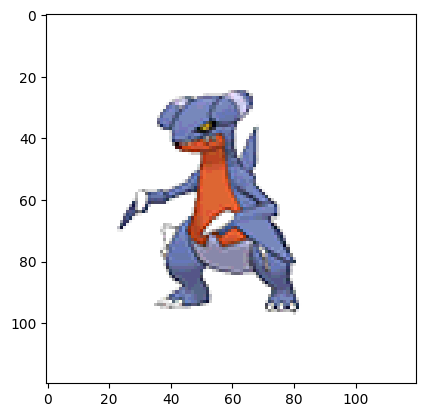

Do you like this image ? (y/n)


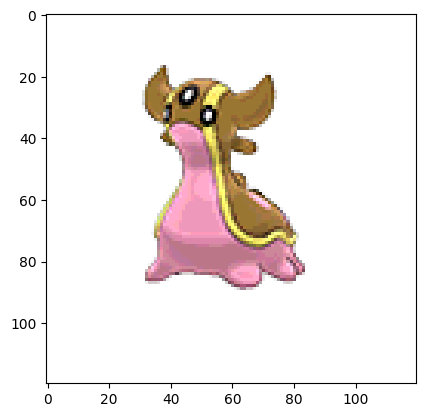

Do you like this image ? (y/n)


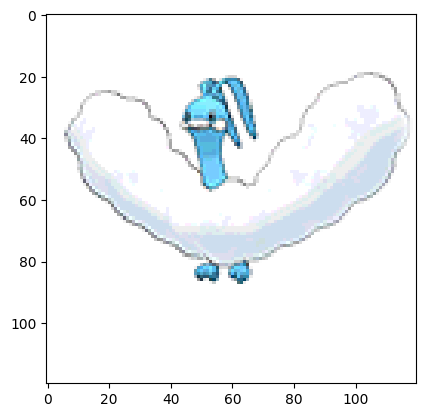

Do you like this image ? (y/n)


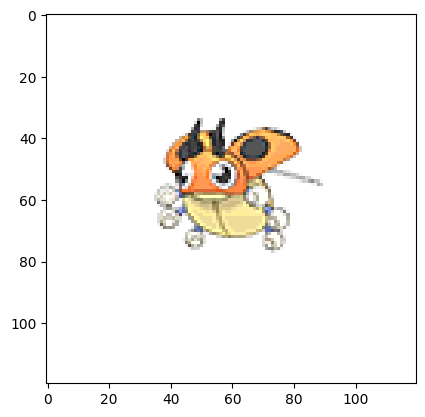

Do you like this image ? (y/n)


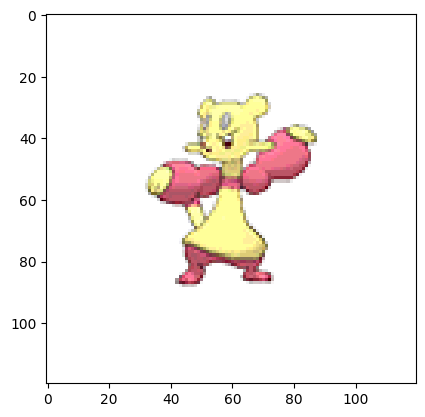

Do you like this image ? (y/n)


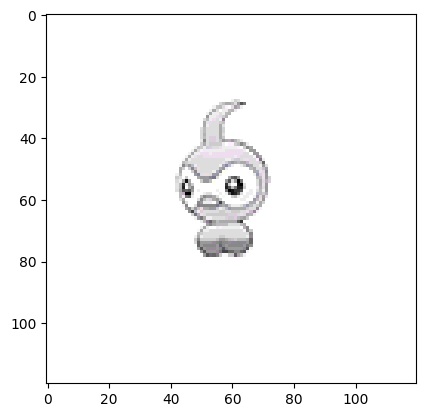

Do you like this image ? (y/n)


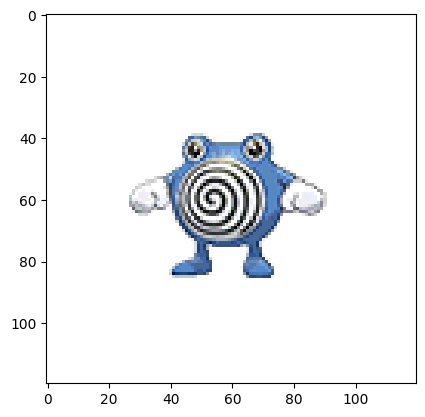

Do you like this image ? (y/n)


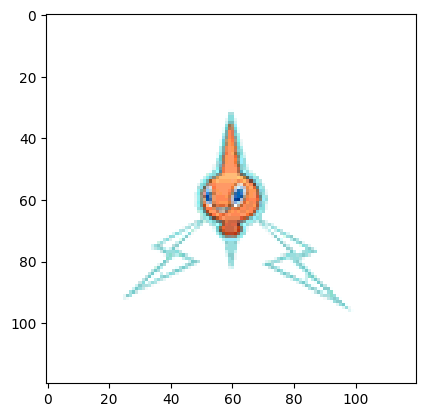

Do you like this image ? (y/n)


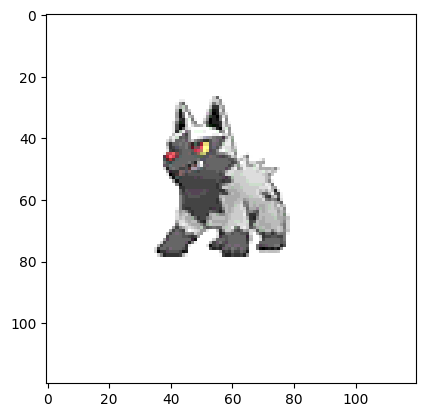

Do you like this image ? (y/n)


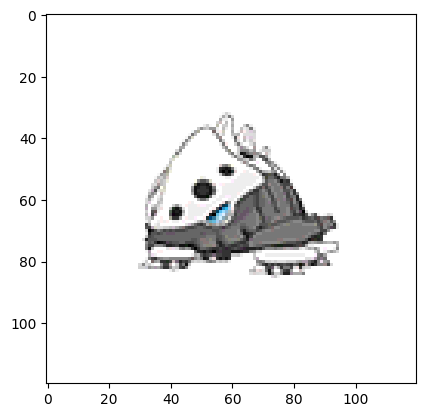

Do you like this image ? (y/n)


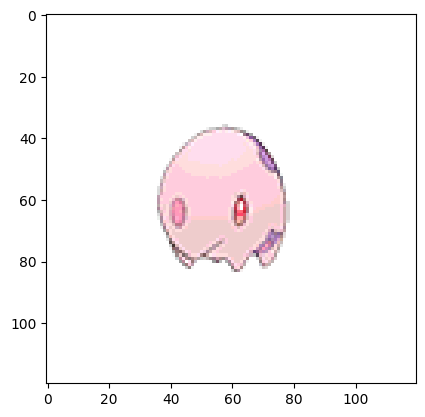

Do you like this image ? (y/n)


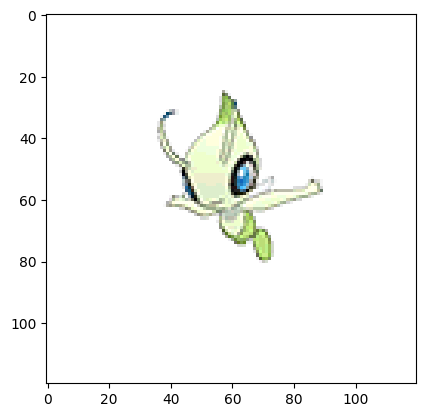

Do you like this image ? (y/n)


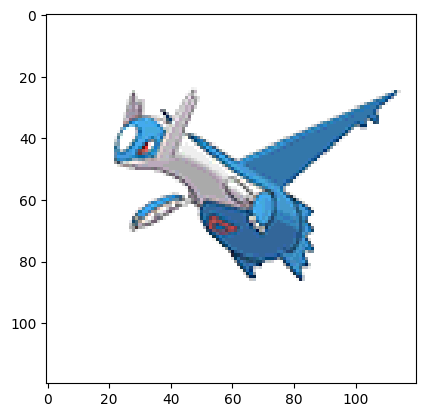

Do you like this image ? (y/n)


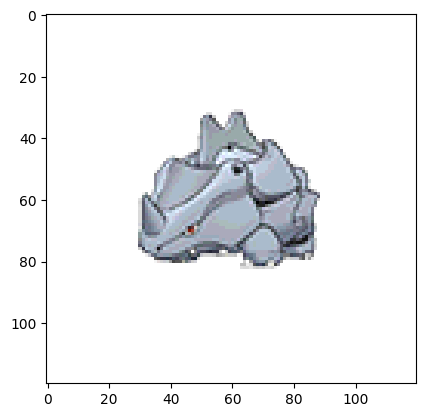

Do you like this image ? (y/n)


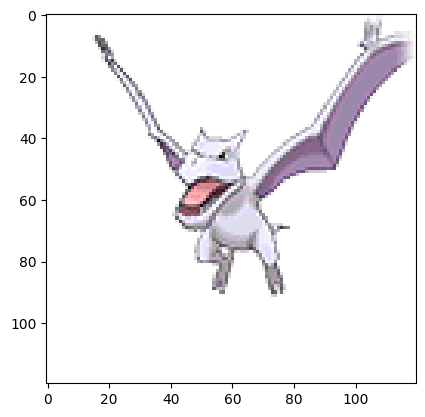

Do you like this image ? (y/n)
Votre compte a bien été créé
{'mwa': [[['lightslategray', 'darkslateblue', 'chocolate', 'lightgray', 'Dragon', 4.0, 0.0, 0.0, 1.4, 56.0], ['sienna', 'rosybrown', 'lightpink', 'silver', 'Water', 4.0, 0.0, 0.0, 0.9, 29.9], ['white', 'powderblue', 'cadetblue', 'silver', 'Dragon', 3.0, 0.0, 0.0, 1.1, 20.6], ['darksalmon', 'bisque', 'darkslategray', 'silver', 'Bug', 2.0, 0.0, 0.0, 1.0, 10.8], ['khaki', 'lightcoral', 'sienna', 'silver', 'Fighting', 5.0, 0.0, 0.0, 0.9, 20.0], ['gainsboro', 'lightslategray', 'black', 'black', 'Normal', 3.0, 0.0, 0.0, 0.3, 0.8], ['darkgray', 'darkslategray', 'whitesmoke', 'black', 'Water', 1.0, 0.0, 0.0, 1.0, 20.0], ['powderblue', 'peru', 'lightcyan', 'black', 'Electric', 4.0, 0.0, 0.0, 0.3, 0.3], ['silver', 'darkslategray', 'gray', 'black', 'Dark', 3.0, 0.0, 0.0, 0.5, 13.6], ['whitesmoke', 'gray', 'darkslategray', 'black', 'Steel', 3.0, 0.0, 0.0, 0.9, 120.0], ['mistyrose', 'rosybrown', 'black', 'black', 'Psychic', 5.0, 0.0, 0.0, 

<Figure size 640x480 with 0 Axes>

In [724]:
def generate_user_preferences():
    username = input("Rentrez votre nom d'utilisateur : ")
    if username in dictionnaire_preferences:
        print("Vous avez déjà un compte")
    else:
        (liste_tags, liste_fav_or_not) = generate_preferences()
        dictionnaire_preferences[username] = [liste_tags, liste_fav_or_not]
        print("Votre compte a bien été créé")

generate_user_preferences()
print(dictionnaire_preferences)

In [727]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = []
result = []

def generate_favorite_image(username):

    data = dictionnaire_preferences[username][0].copy()
    result = dictionnaire_preferences[username][1].copy()

    for imagename in os.listdir("ImagesPokemon"):
        path = os.path.join("ImagesPokemon", imagename)
        if os.path.isfile(path):
            (tags, imagezzz, imagenamezzz) = tags_of_image(imagename)
            if tags not in data and tags != []:
                data.append(tags)
                result.append("")
   
    
    # creating dataframes
    dataframe = pd.DataFrame(data, columns=["color1", "color2", "color3", "color4", "type", "generation", "legendary", "mega", "height", "weight"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # generating numerical labels
    le1 = LabelEncoder()
    dataframe["color1"] = le1.fit_transform(dataframe["color1"])

    le2 = LabelEncoder()
    dataframe["color2"] = le2.fit_transform(dataframe["color2"])

    le3 = LabelEncoder()
    dataframe["color3"] = le3.fit_transform(dataframe["color3"])

    le4 = LabelEncoder()
    dataframe["color4"] = le4.fit_transform(dataframe["color4"])

    le5 = LabelEncoder()
    dataframe["type"] = le5.fit_transform(dataframe["type"])

    le6 = LabelEncoder()
    dataframe["generation"] = le6.fit_transform(dataframe["generation"])

    le7 = LabelEncoder()
    dataframe["legendary"] = le7.fit_transform(dataframe["legendary"])

    le8 = LabelEncoder()
    dataframe["mega"] = le8.fit_transform(dataframe["mega"])

    le9 = LabelEncoder()
    dataframe["height"] = le9.fit_transform(dataframe["height"])

    le10 = LabelEncoder()
    dataframe["weight"] = le10.fit_transform(dataframe["weight"])

    le11 = LabelEncoder()
    resultframe["favorite"] = le11.fit_transform(resultframe["favorite"])

    # Use of decision tree classifiers
    dtc = tree.DecisionTreeClassifier()
    dtc = dtc.fit(dataframe.values, resultframe)

    (tags, image, imagename) = random_image_and_tags()

    # prediction
    prediction = dtc.predict(
        [
            [
                le1.transform([tags[0]])[0],
                le2.transform([tags[1]])[0],
                le3.transform([tags[2]])[0],
                le4.transform([tags[3]])[0],
                le5.transform([tags[4]])[0],
                le6.transform([tags[5]])[0],
                le7.transform([tags[6]])[0],
                le8.transform([tags[7]])[0],
                le9.transform([tags[8]])[0],
                le10.transform([tags[9]])[0]
            ]
        ]
    )
    print(le11.inverse_transform(prediction))
    print(dtc.feature_importances_)

    if le11.inverse_transform(prediction) == "Favori":
        plot.imshow(image)
        plot.show()

generate_favorite_image("mwa")

['']
[0.10829944 0.31252632 0.0332295  0.         0.07031568 0.1859433
 0.05074842 0.         0.03155047 0.20738686]
